## First, define the function to read pedestals from raw data

In [9]:
### func to read pedestals from raw data

import config_utils
import file_utils
import mapping
import os
import numpy as np
from matplotlib import pyplot as plt


def raw_pede(path, dhcs):
    print('read raw pedestals from %s'%path)

    peds_m={}
    for dhc in dhcs:
        for module in dhc.modules:
            
            filename = os.path.join(path, "%srawframe_data.dat" % dhc.name)
            try:
                data = file_utils.read_raw_file(filename, module.dhe, asicpair= 0,
                                            frames=200, use_header=True, skip_broken_frames=True)[0]
            except Exception as e:
                print(module.dhe, e)
                continue

            mapper = mapping.mapper(module_type='pxd9', module_flavor=module.module_flavor, asicpair=0)
            prelimPed = np.median(data, axis=2)
            peds_m[module.dhe] = mapper(prelimPed)
#             peds_m[module.dhe] = np.median(data, axis=2)

    return peds_m

## Draw pedestals from raw data

/home/ye/tmp/EXP0016/pedestal/run0899/ ['H1012', 'H1022', 'H1052', 'H1082', 'H2042', 'H1042', 'H1062', 'H1072', 'H2052', 'H1041', 'H1051', 'H1061', 'H1071', 'H2051', 'H1011', 'H1021', 'H1031', 'H1081', 'H2041']
read raw pedestals from /home/ye/tmp/EXP0016/pedestal/run0899/


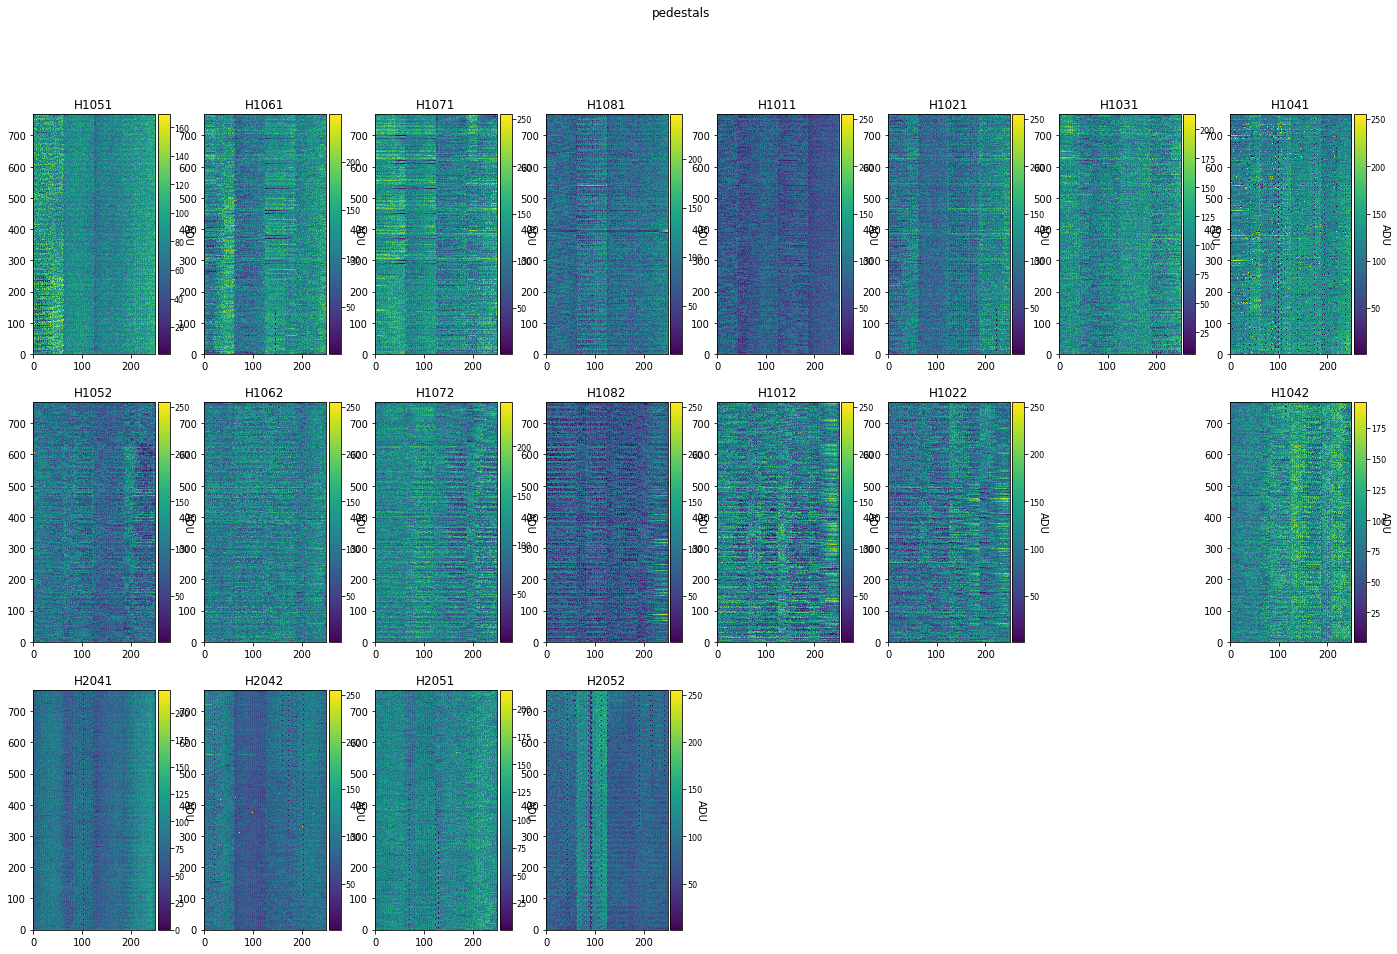

In [10]:
### draw pedestals from raw data


# path = '/data/commissioning/pedestal_scan/2020_10_28_001/'
path = '/home/ye/tmp/EXP0016/pedestal/run0899/'

dhcs = config_utils.get_setup_from_master_config()

dhes = [module.dhe for dhc in dhcs for module in dhc.modules]

print(path, dhes)

pede_m = raw_pede(path, dhcs)

fig = plt.figure(figsize=(24, 15))
fig.suptitle('pedestals')

pos = ['H1051','H1061','H1071','H1081','H1011','H1021','H1031','H1041',
       'H1052','H1062','H1072','H1082','H1012','H1022','H1032','H1042',
       'H2041','H2042','H2051','H2052']

#for i, dhe in enumerate(sorted(dhes)):
for i, dhe in enumerate(pos):
    if dhe == 'H1032':
        continue

    ax = fig.add_subplot(3,8,i+1)    
    
    pos = ax.imshow(pede_m[dhe], interpolation="none",origin="lower", aspect="auto")
    ax.set_title(dhe)            
    cbar = fig.colorbar(pos, fraction=0.126,pad=0.02,orientation="vertical")
    cbar.ax.tick_params(labelsize=8, pad=1)
    cbar.ax.set_ylabel('ADU', rotation=270)

    ax.set_title(dhe)

plt.tight_layout()  


## Compare pedestals

['H1011', 'H1012', 'H1021', 'H1022', 'H1031', 'H1041', 'H1042', 'H1051', 'H1052', 'H1061', 'H1062', 'H1071', 'H1072', 'H1081', 'H1082', 'H2041', 'H2042', 'H2051', 'H2052']
read raw pedestals from /home/ye/tmp/pedestal_scan/2021_03_11_001/
read raw pedestals from /home/ye/tmp/EXP0016/pedestal/run0899/
pede_diff run0899 - 2021_03_11_001


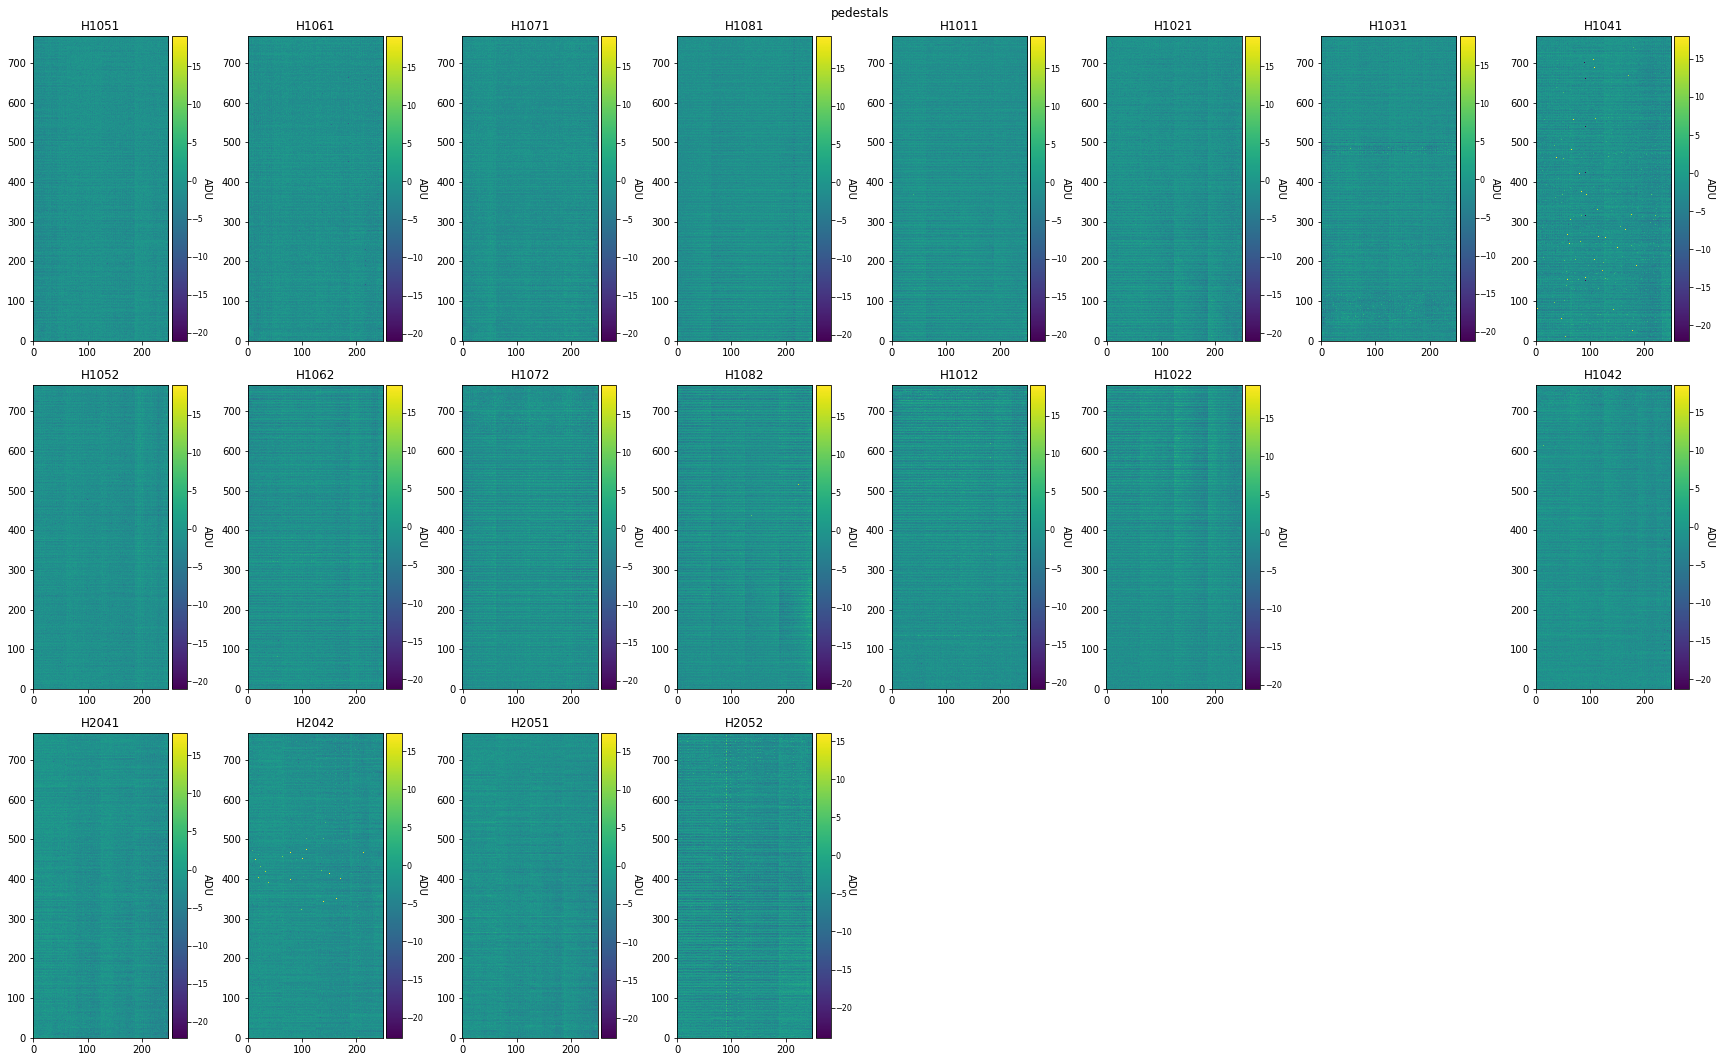

In [13]:
path0 = '/home/ye/tmp/pedestal_scan/2021_03_11_001/'
path1= '/home/ye/tmp/EXP0016/pedestal/run0899/'

label0 = path0.split('/')[-2]
label1 = path1.split('/')[-2]

dhcs = config_utils.get_setup_from_master_config()

dhes = [module.dhe for dhc in dhcs for module in dhc.modules]

print(sorted(dhes))

pede0 = raw_pede(path0, dhcs)
pede1 = raw_pede(path1, dhcs)

print('pede_diff %s - %s'%(label1,label0))

fig = plt.figure(figsize=(24, 15))
fig.suptitle('pedestals')

pos = ['H1051','H1061','H1071','H1081','H1011','H1021','H1031','H1041',
       'H1052','H1062','H1072','H1082','H1012','H1022','H1032','H1042',
       'H2041','H2042','H2051','H2052']

#for i, dhe in enumerate(sorted(dhes)):
for i, dhe in enumerate(pos):
    if dhe == 'H1032':
        continue

    ax = fig.add_subplot(3,8,i+1)  
    
    try:
        ped_diff = pede1[dhe].astype(np.int16) - pede0[dhe].astype(np.int16)
    except Exception as e:
        print(e)
        continue
        
    ped_diff_mean = np.mean(ped_diff)
    ped_diff_std = np.std(ped_diff)
#     vmax = ped_diff_mean+2*ped_diff_std
#     vmin = ped_diff_mean-2*ped_diff_std
    vmax=ped_diff_mean+20
    vmin=ped_diff_mean-20 
    
    pos = ax.imshow(ped_diff, interpolation="none",origin="lower", aspect="auto",
                         vmin=vmin, vmax=vmax)
    ax.set_title(dhe)            
    cbar = fig.colorbar(pos, fraction=0.126,pad=0.02,orientation="vertical")
    cbar.ax.tick_params(labelsize=8, pad=1)
    cbar.ax.set_ylabel('ADU', rotation=270)

    ax.set_title(dhe)

plt.tight_layout()  
